In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
%matplotlib inline

### I. Data Cleaning and Preprocessing (for dataset A)

In [3]:
# loading data set from file
df=pd.read_csv("data/DataA.csv")
df.head()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,1,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,2,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,3,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,4,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,5,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


In [5]:
df.shape

(19000, 81)

#### 1. Detect any problems that need to be fixed in dataset A. Report such problems.
#### 2. Fix the detected problems using some of the methods discussed in class.

In [6]:
df = df.iloc[:18227:,:]
df.shape

(18227, 81)

In [7]:
#replace missing values with means of respective features
df = df.fillna(df.mean())
df.isna().any().any()

False

In [8]:
df.describe()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
count,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,...,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000
mean,-132.812384,698.264485,597.541402,-307.128462,909.548077,-32.760824,61.974363,899.313498,81.650478,356.638752,...,-124.658035,-37.973391,137.400176,374.762934,-880.583804,-47.607780,137.641192,-18.099523,4.671257,20.726834
std,280.937065,371.370878,392.123815,183.015924,193.819578,253.812810,316.277302,196.136875,326.750917,341.394953,...,481.492994,355.841529,352.788441,583.792739,217.634117,373.064609,248.988603,778.015520,480.779966,455.160604
min,-2724.000000,-855.000000,-2196.000000,-1365.000000,-245.000000,-920.000000,-1580.000000,-149.000000,-1624.000000,-1792.000000,...,-953.000000,-853.000000,-771.000000,-984.000000,-2562.000000,-5424.000000,-3133.000000,-7189.000000,-5861.000000,-3051.000000
25%,-176.000000,362.000000,311.000000,-408.500000,861.000000,-144.000000,-129.500000,855.000000,-153.000000,161.000000,...,-487.000000,-323.000000,-173.000000,29.000000,-983.000000,-276.000000,31.000000,-246.500000,-118.000000,-115.000000
50%,-104.000000,795.000000,590.000000,-266.000000,969.000000,-39.000000,67.000000,945.000000,45.000000,376.000000,...,-223.000000,32.000000,251.000000,698.000000,-940.000000,0.000000,132.000000,-29.000000,4.000000,19.000000
75%,-17.000000,982.000000,952.000000,-167.000000,1006.000000,45.000000,249.000000,996.000000,314.000000,580.000000,...,174.000000,179.000000,413.000000,823.000000,-840.000000,225.000000,276.000000,195.000000,115.000000,169.000000
max,1887.000000,2531.000000,2941.000000,609.000000,1833.000000,1215.000000,1490.000000,1682.000000,1096.000000,2202.000000,...,949.000000,775.000000,759.000000,999.000000,613.000000,4877.000000,3742.000000,7497.000000,8675.000000,5821.000000


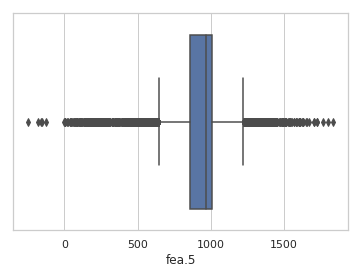

In [9]:
sns.set(style="whitegrid")
sns.boxplot(x=df["fea.5"])

#### 3. Normalize the data using min-max and z-score normalization. Plot histograms of feature 9 and 24; compare and comment on the differences before and after normalization.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2042acc128>],
      dtype=object)

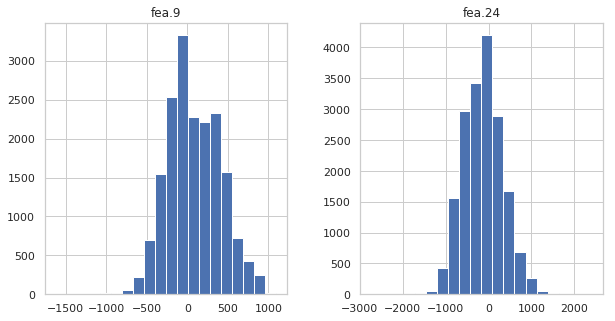

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df.hist('fea.9', bins=20, ax=axes[0])
df.hist('fea.24', bins=20, ax=axes[1])

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = df.columns
df_normalized.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,0.557580,0.374778,0.610278,0.609929,0.602502,0.477283,0.446254,0.599126,0.719485,0.443916,...,0.845426,0.329853,0.306536,0.185073,0.506142,0.500922,0.459055,0.487539,0.405682,0.346596
1,0.558230,0.376551,0.610278,0.601824,0.602984,0.479157,0.447231,0.594211,0.713235,0.450926,...,0.845426,0.334152,0.305229,0.184065,0.506142,0.500825,0.458473,0.487403,0.406439,0.344229
2,0.556062,0.380095,0.610668,0.609422,0.590472,0.476815,0.450163,0.592572,0.712868,0.446169,...,0.845426,0.338452,0.302614,0.183056,0.502677,0.500340,0.457164,0.486926,0.404582,0.343891
3,0.553676,0.380095,0.604828,0.603343,0.598653,0.484778,0.453746,0.582742,0.721324,0.457186,...,0.845426,0.343980,0.300000,0.182552,0.503307,0.500437,0.457745,0.486041,0.405476,0.343778
4,0.553676,0.458731,0.608332,0.595745,0.601059,0.479625,0.450163,0.594211,0.725735,0.463696,...,0.845426,0.349509,0.296078,0.181543,0.502677,0.501116,0.459200,0.486790,0.403275,0.344342


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f20429f0eb8>],
      dtype=object)

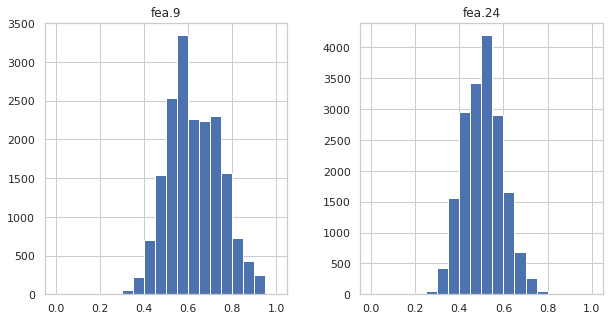

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
df_normalized.hist('fea.9', bins=20, ax=axes[0])
df_normalized.hist('fea.24', bins=20, ax=axes[1])

In [13]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_std = pd.DataFrame(np_scaled)
df_std.columns = df.columns
df_std.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,-0.071860,-0.765467,0.870817,0.798469,0.502811,0.519140,-0.859947,0.248234,0.769260,-1.100336,...,1.619295,-0.781343,-1.245540,-1.698874,-0.341942,-0.580055,-0.460440,-0.014011,0.065164,0.007191
1,-0.061181,-0.749311,0.870817,0.711042,0.507970,0.534900,-0.850462,0.202346,0.717231,-1.018317,...,1.619295,-0.761671,-1.251210,-1.702300,-0.341942,-0.582736,-0.476506,-0.016582,0.088044,-0.038947
2,-0.096777,-0.716997,0.875917,0.793004,0.373821,0.515200,-0.822005,0.187051,0.714171,-1.073973,...,1.619295,-0.741998,-1.262548,-1.705726,-0.392487,-0.596139,-0.512653,-0.025579,0.031884,-0.045539
3,-0.135933,-0.716997,0.799409,0.727435,0.461534,0.582181,-0.787224,0.095275,0.784563,-0.945086,...,1.619295,-0.716706,-1.273887,-1.707439,-0.383297,-0.593458,-0.496587,-0.042289,0.058924,-0.047736
4,-0.135933,0.000000,0.845314,0.645472,0.487332,0.538840,-0.822005,0.202346,0.821289,-0.868926,...,1.619295,-0.691413,-1.290895,-1.710865,-0.392487,-0.574694,-0.456424,-0.028150,-0.007636,-0.036750


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2033662e48>],
      dtype=object)

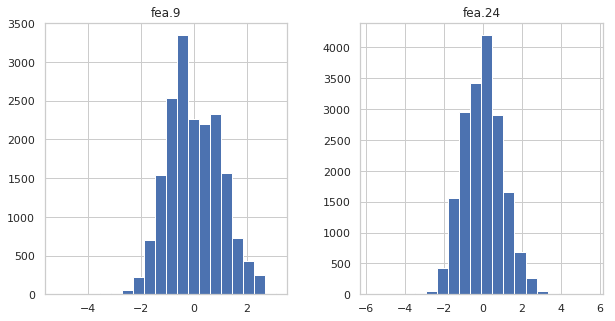

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
df_std.hist('fea.9', bins=20, ax=axes[0])
df_std.hist('fea.24', bins=20, ax=axes[1])

### II. Feature Extraction (for dataset B)

#### 1. Use PCA as a dimensionality reduction technique to the data, compute the eigenvectors andeigenvalues.

In [2]:
# loading data set from file
df=pd.read_csv("data/DataB.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,4,4,3,0,0,4,2,1,4,1,...,1,3,0,4,2,1,1,4,5,0
1,5,1,4,3,1,3,5,1,4,4,...,1,1,3,3,1,3,3,5,4,0
2,1,3,0,3,1,1,0,1,0,2,...,3,0,2,4,2,2,1,2,4,0
3,5,3,2,3,5,2,2,0,4,5,...,5,4,5,1,4,4,2,4,4,0
4,3,5,3,3,0,4,1,1,4,3,...,1,3,3,3,1,2,4,1,1,0


In [3]:
labels = df['gnd']
df.drop(columns = ['gnd'], inplace = True)
labels.value_counts()

1    454
4    431
2    417
3    398
0    366
Name: gnd, dtype: int64

In [4]:
df.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,4,4,3,0,0,4,2,1,4,1,...,1,1,3,0,4,2,1,1,4,5
1,5,1,4,3,1,3,5,1,4,4,...,3,1,1,3,3,1,3,3,5,4
2,1,3,0,3,1,1,0,1,0,2,...,4,3,0,2,4,2,2,1,2,4
3,5,3,2,3,5,2,2,0,4,5,...,4,5,4,5,1,4,4,2,4,4
4,3,5,3,3,0,4,1,1,4,3,...,1,1,3,3,3,1,2,4,1,1


In [5]:
def mean_subtract(data):
    data_re = data - np.mean(data)
    return data_re
#centalizing data by subtracting each point by its mean
df = mean_subtract(df)

In [6]:
df.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,1.491772,1.452565,0.539206,-2.496612,-2.472894,1.509681,-0.486447,-1.512585,1.477735,-1.482091,...,-1.517909,-1.469506,0.477251,-2.486447,1.550339,-0.498064,-1.525653,-1.54211,1.59971,2.480639
1,2.491772,-1.547435,1.539206,0.503388,-1.472894,0.509681,2.513553,-1.512585,1.477735,1.517909,...,0.482091,-1.469506,-1.522749,0.513553,0.550339,-1.498064,0.474347,0.45789,2.59971,1.480639
2,-1.508228,0.452565,-2.460794,0.503388,-1.472894,-1.490319,-2.486447,-1.512585,-2.522265,-0.482091,...,1.482091,0.530494,-2.522749,-0.486447,1.550339,-0.498064,-0.525653,-1.54211,-0.40029,1.480639
3,2.491772,0.452565,-0.460794,0.503388,2.527106,-0.490319,-0.486447,-2.512585,1.477735,2.517909,...,1.482091,2.530494,1.477251,2.513553,-1.449661,1.501936,1.474347,-0.54211,1.59971,1.480639
4,0.491772,2.452565,0.539206,0.503388,-2.472894,1.509681,-1.486447,-1.512585,1.477735,0.517909,...,-1.517909,-1.469506,0.477251,0.513553,0.550339,-1.498064,-0.525653,1.45789,-1.40029,-1.519361


In [20]:
# Data Matrix
X = np.asmatrix(df)
#Covariance Matrix
cov = np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(cov)

#### 2. Plot a 2 dimensional representation of the data points based on the first and second principal components. Explain the results versus the known classes (display data points of each class with a different color).

In [21]:
#Selecting only first 2 principal Components
V = np.asmatrix(eig_vecs[:,:2])
#Projecting original data points on to 2 Principal components
Y = np.dot(V.T, X.T)
Y.T.shape

(2066, 2)

In [22]:
df_reduced12 = pd.DataFrame(Y.T)
df_reduced12.columns = ['Projection on PC1','Projection on PC2']
df_reduced12['Label'] = labels
df_reduced12.head()

,Projection on PC1,Projection on PC2,Label
0,1069.166304,513.973184,0
1,1099.176077,570.842223,0
2,673.201385,167.377150,0
3,1010.903339,187.044145,0
4,1692.970822,633.369398,0


In [23]:
df_reduced12.shape

(2066, 3)

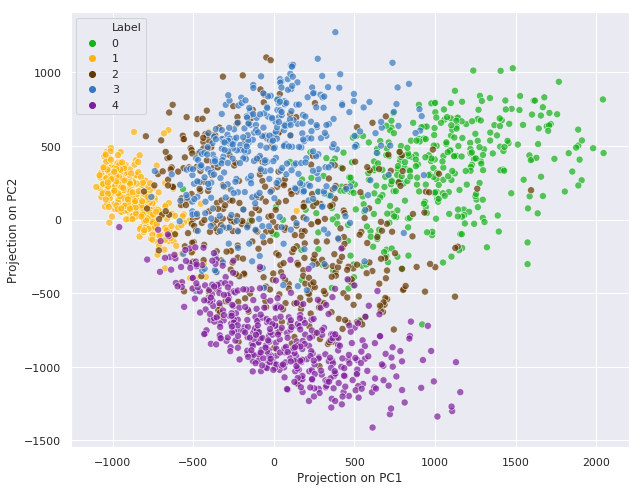

In [24]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 8))
colors = ["green", "amber", "brown", "windows blue", "purple"]
sns.scatterplot(ax = ax, x="Projection on PC1", y="Projection on PC2", alpha = 0.7, s = 50,
                hue="Label", data=df_reduced12, palette=sns.xkcd_palette(colors))

#### 3. Repeat step 2 for the 5th and 6st components. Comment on the result.

In [25]:
#Selecting 5th and 6th principal Components. i. e index 4 and 5 gives 5th and 6th eigen vectors
V = np.asmatrix(eig_vecs[:,4:6])
#Projecting original data points on to 2 Principal components
Y = np.dot(V.T, X.T)
Y.T.shape

(2066, 2)

In [26]:
df_reduced56 = pd.DataFrame(Y.T)
df_reduced56.columns = ['Projection on PC5','Projection on PC6']
df_reduced56['Label'] = labels
df_reduced56.head()

,Projection on PC5,Projection on PC6,Label
0,-387.873484,-335.304982,0
1,-345.573249,-530.737220,0
2,-1036.833666,76.531663,0
3,-901.897549,73.661148,0
4,6.919257,-601.851221,0


In [27]:
df_reduced56.shape

(2066, 3)

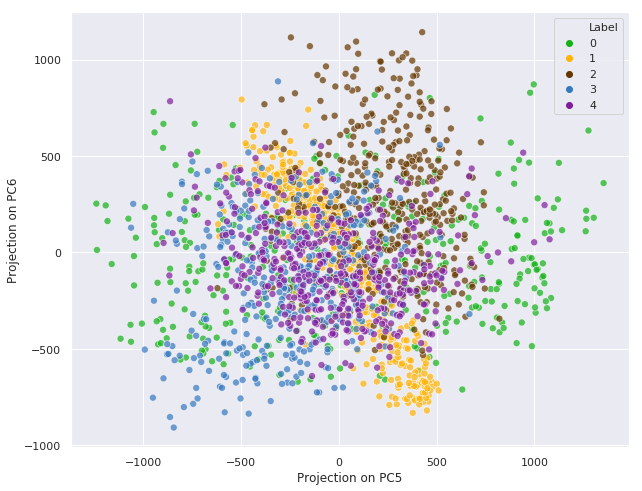

In [28]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 8))
colors = ["green", "amber", "brown", "windows blue", "purple"]
sns.scatterplot(ax = ax, x="Projection on PC5", y="Projection on PC6", alpha = 0.7, s = 50,
                hue="Label", data=df_reduced56, palette=sns.xkcd_palette(colors))

#### 4. Use the Naive Bayes classifier to classify 8 sets of dimensionality reduced data (using the first 2, 4, 10, 30, 60, 200, 500, and all 784 PCA components). Plot the classification error for the 8 sets against the retained variance of each case.

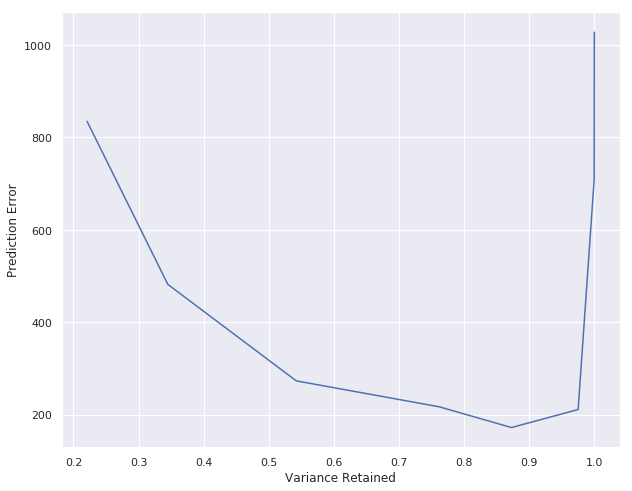

In [29]:
from sklearn.naive_bayes import GaussianNB

def NaiveBayesClassifier(n, df):
    # Data Matrix
    X = np.asmatrix(df)
    #Covariance Matrix
    cov = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cov)
    #Selecting only first 2 principal Components
    V = np.asmatrix(eig_vecs[:,:n])
    retained_var = sum(eig_vals[:n])/sum(eig_vals)
    #Projecting original data points on to 2 Principal components
    Y = np.dot(V.T, X.T)
    df_reduced = pd.DataFrame(Y.T)
    sns.set()
    clf = GaussianNB()
    clf.fit(df_reduced, labels)
    predicted = clf.predict(df_reduced)
    error = abs(predicted - labels)
    df_reduced['Label'] = labels
    return retained_var, sum(error)

df_nb = df[:]
final = []
components = [2, 4, 10, 30, 60, 200, 500, 784]
for i in components:
    final.append(NaiveBayesClassifier(i, df_nb))
    
df_final = pd.DataFrame(final)
df_final.columns = ['Variance Retained','Prediction Error']

fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x="Variance Retained", y="Prediction Error", data=df_final)

#### 5. As the class labels are already known, you can use the Linear Discriminant Analysis (LDA)to reduce the dimensionality, plot the data points using the first 2 LDA components (display data points of each class with a different color). Explain the results obtained in terms of the known classes. Compare with the results obtained by using PCA.

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components=2)
lda_components = clf.fit_transform(df, labels)
df_lda = principalDf = pd.DataFrame(lda_components)
df_lda.columns = ['LDA Component 1', 'LDA Component 2']
df_lda['Label'] = labels

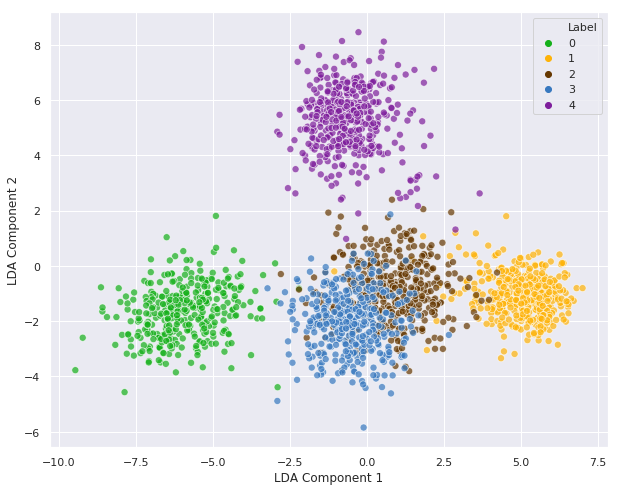

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
colors = ["green", "amber", "brown", "windows blue", "purple"]
sns.scatterplot(ax = ax, x="LDA Component 1", y="LDA Component 2", alpha = 0.7, s = 50,
                hue="Label", data=df_lda, palette=sns.xkcd_palette(colors))

### III. Nonlinear Dimensionality Reduction (for dataset B)

#### Apply the nonlinear dimensionality reduction methods Locally Linear Embedding (LLE) and ISOMAP to the dataset B, set the number of nearest neighbours to be 5, the projected low dimension to be 4.

In [8]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_neighbors=5, n_components=4)
X_lle = embedding.fit_transform(df)
X_lle.shape

(2066, 4)

In [9]:
df_lle = pd.DataFrame(X_lle)
df_lle.columns = ['LLE Component 1', 'LLE Component 2', 'LLE Component 3', 'LLE Component 4']
df_lle.head()

,LLE Component 1,LLE Component 2,LLE Component 3,LLE Component 4
0,-0.045258,0.000863,-0.000510,0.000526
1,-0.045061,0.000828,-0.000496,0.000479
2,-0.044573,0.000925,-0.000081,0.001249
3,-0.044700,0.000871,-0.000293,0.000928
4,-0.046829,0.001125,-0.000661,0.000852


In [34]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=4)
X_isomap = embedding.fit_transform(df)
X_isomap.shape

(2066, 4)

In [35]:
df_isomap = pd.DataFrame(X_isomap)
df_isomap.columns = ['Isomap Component 1', 'Isomap Component 2', 'Isomap Component 3', 'Isomap Component 4']
df_isomap.head()

,Isomap Component 1,Isomap Component 2,Isomap Component 3,Isomap Component 4
0,-8706.049952,-344.127405,344.048497,1657.818864
1,-8858.821154,-333.866129,-280.234058,1752.912922
2,-3954.252089,-926.795027,-1093.258392,43.631241
3,-5791.867059,-643.647584,-552.428333,256.098798
4,-10700.083472,281.608819,-768.689592,108.528612


#### 1. Apply LLE to the images of digit ’3’ only. Visualize the original images by plotting the images corresponding to those instances on 2-D representations of the data based on the first and second components of LLE, see Figure for an example of what this looks like for random location of images on of the number 1-3. Describe qualitatively what kind of variations is captured.

In [10]:
df['label'] = labels
df.head()
df['label'].value_counts()

1    454
4    431
2    417
3    398
0    366
Name: label, dtype: int64

In [11]:
df_3 = df.loc[df['label'].isin([3])]
df_3_labels = df_3['label']
df_3.drop(columns = ['label'], inplace = True)
df_3.head()

/home/acer/anaconda3/envs/DSDJ/lib/python3.7/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
1237,0.491772,1.452565,-0.460794,-1.496612,0.527106,0.509681,-2.486447,-1.512585,-0.522265,-2.482091,...,1.482091,2.530494,2.477251,-2.486447,-2.449661,0.501936,0.474347,0.45789,-0.40029,0.480639
1238,1.491772,0.452565,2.539206,-0.496612,-2.472894,1.509681,0.513553,2.487415,2.477735,-0.482091,...,-1.517909,1.530494,-0.522749,-2.486447,-0.449661,0.501936,0.474347,2.45789,-0.40029,2.480639
1239,-2.508228,1.452565,-0.460794,1.503388,-0.472894,-1.490319,1.513553,-0.512585,0.477735,2.517909,...,-1.517909,-1.469506,2.477251,2.513553,-2.449661,-1.498064,1.474347,0.45789,-1.40029,2.480639
1240,-0.508228,0.452565,-1.460794,-0.496612,-0.472894,0.509681,-1.486447,-0.512585,0.477735,0.517909,...,1.482091,2.530494,0.477251,0.513553,-2.449661,1.501936,-1.525653,0.45789,0.59971,1.480639
1241,-2.508228,1.452565,-0.460794,-2.496612,2.527106,-1.490319,0.513553,1.487415,0.477735,1.517909,...,0.482091,-0.469506,-1.522749,1.513553,-2.449661,-1.498064,-1.525653,-0.54211,0.59971,-1.519361


In [12]:
embedding = LocallyLinearEmbedding(n_components=2)
X_lle_3 = embedding.fit_transform(df_3)
df_lle_3 = pd.DataFrame(X_lle_3)
df_lle_3.columns = ['LLE Component 1', 'LLE Component 2']
# df_lle_3['label'] = np.asarray(df_3_labels)
df_lle_3.head()
# df_3_labels.head()

,LLE Component 1,LLE Component 2
0,-0.106611,0.000027
1,0.039713,0.065847
2,0.032155,-0.105110
3,-0.039992,-0.023778
4,0.024632,-0.037529


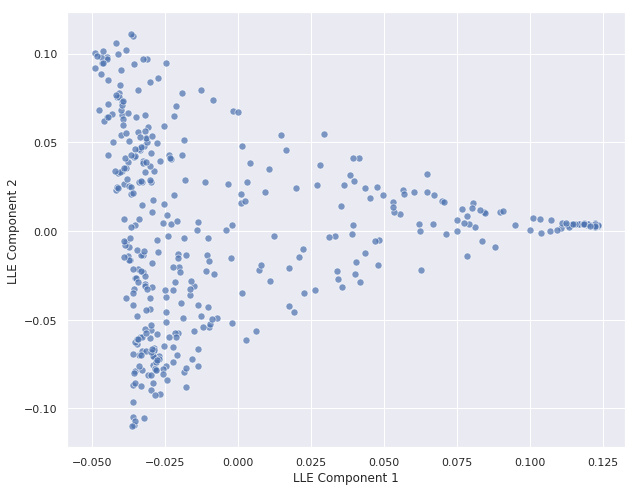

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))
colors = ["green"]
sns.scatterplot(ax = ax, x="LLE Component 1", y="LLE Component 2", alpha = 0.7, s = 50,
                data=df_lle_3, palette=sns.xkcd_palette(colors))

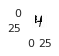

In [240]:
from PIL import Image
df_img=pd.read_csv("data/DataB.csv")
df_img = df_img.loc[:, ~df_img.columns.str.contains('^Unnamed')]
df_img.drop(columns = ['gnd'], inplace = True)
pixels = df_img.loc[2000, :]
pixels = np.array(pixels, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))
# img = Image.fromarray(pixels, 'RGB')
# Plot
img = Image.fromarray(pixels)
fig, ax = plt.subplots(figsize=(0.3, 0.3))
# plt.scatter(0,0, plt.imshow(pixels, cmap='gray_r'))
img = plt.imshow(pixels, cmap='gray_r')
# plt.savefig('3.png')
# im = Image.open("3.png)
# type(img)

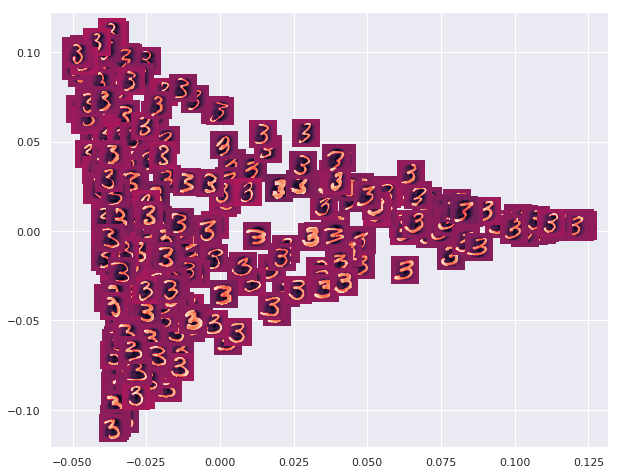

In [292]:
def grayConversion(image):
    grayValue = 0.07 * image[:,:,2] + 0.72 * image[:,:,1] + 0.21 * image[:,:,0]
    gray_img = grayValue.astype(np.uint8)
    return gray_img

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import cv2

def main(x,y,z):
    fig, ax = plt.subplots(figsize=(10, 8))
    imscatter(x, y, z, zoom=1, ax=ax)
#     ax.plot(x, y)
    plt.show()

def imscatter(x, y, z, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()   
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, z0 in zip(x, y, z):
#         pixels = np.array(z0, dtype='uint8')
        # Reshape the array into 28 x 28 array (2-dimensional array)
        z0 /= z0.max() 
        pixels = z0.reshape(28, 28)
        img = Image.fromarray(pixels)
        im = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

x = df_lle_3['LLE Component 1']
y = df_lle_3['LLE Component 2']
z =  np.array(df_3)
main(x, y, z)

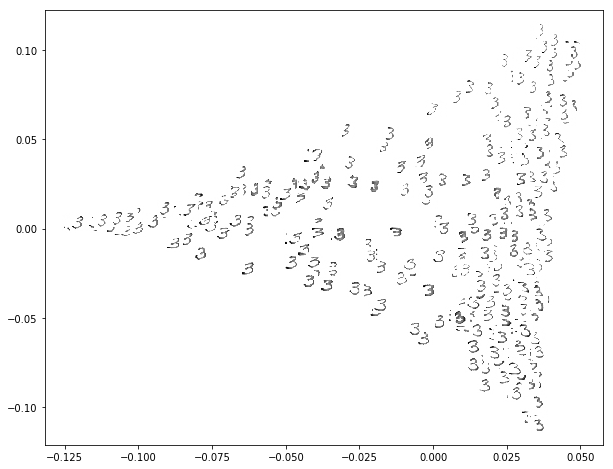

In [36]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import cv2
def imscatter(x, y, z, ax=None, zoom=0.6):
    if ax is None:
        ax = plt.gca()
#     try:
#         image = plt.imread(image)
#     except TypeError:
#         # Likely already an array...
#         pass
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, z0 in zip(x, y, z):
        z0 = z0.reshape(28, 28)
#         img = z0*255.
#         img = 255 - z0
#         img = z0.astype(np.uint8)
        # OpenCV uses BGR and plt uses RGB
#         img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        im = OffsetImage(z0, norm=plt.Normalize(0,255), cmap="Greys", zoom=zoom)
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists 

x = df_lle_3['LLE Component 1']
y = df_lle_3['LLE Component 2']
z =  np.array(df_3)

fig, ax = plt.subplots(figsize=(10, 8))
imscatter(x,y,z)

In [ ]:
from PIL import Image
df_img=pd.read_csv("data/DataB.csv")
df_img = df_img.loc[:, ~df_img.columns.str.contains('^Unnamed')]
df_img.drop(columns = ['gnd'], inplace = True)
pixels = df_img.loc[2000, :]
pixels = np.array(pixels, dtype='uint8')
pixels = pixels.reshape((28, 28))

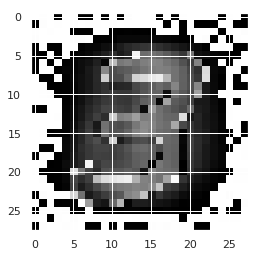

In [294]:
import numpy as np
import matplotlib.pyplot as plt

# X = 10*np.random.rand(5, 3)

fig, ax = plt.subplots()
ax.imshow(pixels, interpolation='nearest', cmap='gray_r')

numrows, numcols = pixels.shape


# def format_coord(x, y):
#     col = int(x + 0.5)
#     row = int(y + 0.5)
#     if col >= 0 and col < numcols and row >= 0 and row < numrows:
#         z = X[row, col]
#         return 'x=%1.4f, y=%1.4f, z=%1.4f' % (x, y, z)
#     else:
#         return 'x=%1.4f, y=%1.4f' % (x, y)

x = df_lle_3['LLE Component 1']
y = df_lle_3['LLE Component 2']
ax.format_coord = x, y
plt.show()

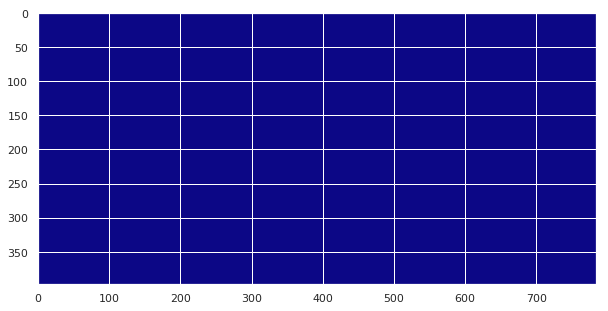

In [254]:
from matplotlib import cm
xaxis = df_lle_3['LLE Component 1']
yaxis = df_lle_3['LLE Component 2']
plt.figure(figsize=[10,5])
# plt.ylim([200,0])
# pixels = np.array(df_3.iloc[0,:], dtype='uint8')
# # Reshape the array into 28 x 28 array (2-dimensional array)
# pixels = pixels.reshape((28, 28))
plt.imshow(df_3, cmap=cm.plasma, interpolation="none", aspect='auto', vmax=500000)
plt.show()